In [3]:
# 1. Load the scikit-learn version of the diabetes dataset into your Jupyter
# notebook using the load_diabetes function.

import sklearn
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [37]:

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import math 

In [38]:
# Check the description

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [39]:
# 2. Split the dataset into the training and test sets. You may use the function
# train_test_split in scikit-learn. Here and below use your birthday
# (in the format DDMM omitting leading zeros if any) as random_state.

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
diabetes.target, random_state=2509)
# Check the split data
print(X_train.shape)
print(X_test.shape)


(331, 10)
(111, 10)


In [40]:
# We can see in the description the number of observations and attributes are matching

In [41]:
# 3. What is the training and test R2
# for the Lasso model using the default
# parameters? How many features does this model use? What are the names
# of those features? Write the answers in your Jupyter notebook. Here and
# below, you are allowed to use any scikit-learn functions.

# As we can see in the description the data have been normalized

# I want to check Linear regression model to make sure I am performing the correct action

from sklearn import linear_model

In [42]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

print(regr.coef_)

[ -37.6457136  -283.52963516  544.88293088  326.40352249 -711.97585107
  410.18288208   51.77074959  179.72520537  697.90581641   50.91481612]


In [43]:
import numpy as np

In [44]:
# The mean square error for train
np.mean((regr.predict(X_train) - y_train)**2)


2989.3852488373027

In [45]:
# The mean square error for test
np.mean((regr.predict(X_test) - y_test)**2)

2524.1647547328043

In [46]:
regr.score(X_test,y_test)

0.5363269597446434

In [47]:
regr.score(X_train,y_train)

0.5092946474416031

In [48]:
# I will now check Lasso model

from sklearn.linear_model import Lasso

In [49]:
# There are different ways to perform this

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [50]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.35126501039731695
test score:  0.3776703390961572
number of features used:  3


In [51]:
# As we can see, this model is using 3 features
num_coef=np.sum(lasso.coef_!=0)
print(num_coef)
lasso.coef_

3


array([  0.        ,  -0.        , 409.05499972,   2.0440825 ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       272.51825049,   0.        ])

In [52]:
# We can try different alpha values

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [54]:
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.5077665408846104
test score for alpha =0.01:  0.5330202804857334
number of features used: for alpha =0.01: 9


In [55]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [57]:
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.5092942660898914
test score for alpha =0.0001:  0.536305060641824
number of features used: for alpha =0.0001: 10


In [58]:
lasso100 = Lasso(alpha=100, max_iter=10e5)
lasso100.fit(X_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
train_score100=lasso100.score(X_train,y_train)
test_score100=lasso100.score(X_test,y_test)
coeff_used100 = np.sum(lasso100.coef_!=0)

In [60]:
print ("training score for alpha=100:", train_score100)
print ("test score for alpha =100: ", test_score100)
print ("number of features used: for alpha =100:", coeff_used100)

training score for alpha=100: 0.0
test score for alpha =100:  -0.0006289903135767716
number of features used: for alpha =100: 0


In [61]:
lasso1 = Lasso(alpha=1, max_iter=10e5)
lasso1.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
train_score1=lasso1.score(X_train,y_train)
test_score1=lasso1.score(X_test,y_test)
coeff_used1 = np.sum(lasso1.coef_!=0)

In [63]:
print ("training score for alpha=1:", train_score1)
print ("test score for alpha =1: ", test_score1)
print ("number of features used: for alpha =1:", coeff_used1)

training score for alpha=1: 0.35126501039731695
test score for alpha =1:  0.3776703390961572
number of features used: for alpha =1: 3


In [64]:
# The mean square error for Lasso test
np.mean((lasso.predict(X_test) - y_test)**2)

3387.8670086429515

In [65]:
# The mean square error for Lasso train
np.mean((lasso.predict(X_train) - y_train)**2)

3952.1044517077908

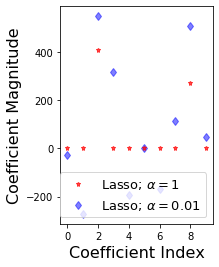

In [66]:
# Plotting- maybe i can leave it without

import matplotlib.pyplot as plt 
%matplotlib inline 

plt.subplot(1,2,1)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

NameError: name 'lr' is not defined

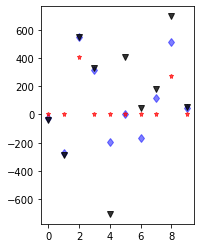

In [67]:
plt.subplot(1,2,2)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [69]:
from pandas import read_csv

In [73]:
# 4. Now load the original diabetes dataset

diabetes = read_csv('diabetes.txt', sep = '\t')

data = diabetes.values

In [75]:
# 5. Split the dataset into the training and test sets. Use your birthday (in the
# format DDMM) as random_state.

X,y=data[:, :1], data[:,-1]    
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2509)



In [82]:
X[:3]

array([[59.],
       [48.],
       [72.]])

In [77]:
data.shape

(442, 11)

In [78]:
# 6. Repeat item 3 for the current dataset. Comment on the differences from
# what you saw in item 3.
# Please note the data is not normalized
 
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

print(regr.coef_)

[1.07062701]


In [79]:
# The mean square error for train
np.mean((regr.predict(X_train) - y_train)**2)

5905.231825180688

In [81]:
# The mean square error for test
np.mean((regr.predict(X_test) - y_test)**2)

5173.3799250622615

In [83]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [84]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.030659605632964215
test score:  0.04963130496178947
number of features used:  1


In [85]:
num_coef=np.sum(lasso.coef_!=0)
print(num_coef)
lasso.coef_

1


array([1.06449032])

In [86]:
# Let's try to normalise the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X,y=data[:, :1], data[:,-1]    
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2509)

In [87]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [88]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.030659605632964215
test score:  0.04963130496178947
number of features used:  1


In [89]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(331, 1)
[19.]
[79.]
[0.]
[1.]


In [90]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[0.]
[1.]


In [91]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [92]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.030659605632964215
test score:  0.04963130496178947
number of features used:  1
